In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.2,0.1],[0.1,1.3]])

distribution1 = np.random.multivariate_normal(mean_01, cov_01,500)
distribution2 = np.random.multivariate_normal(mean_02, cov_02,500)

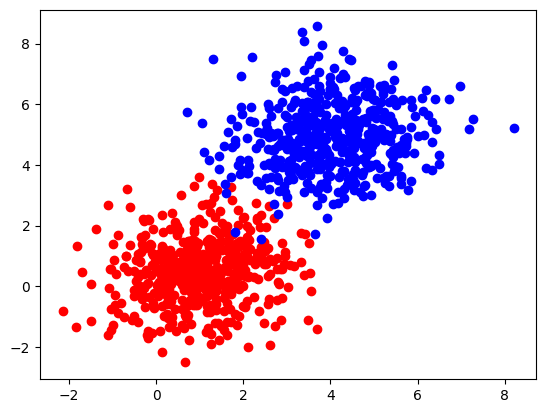

In [5]:
plt.scatter(distribution1[:,0], distribution1[:,1], color='red')
plt.scatter(distribution2[:,0], distribution2[:,1],color='blue')
plt.show()

In [6]:
combined_data = np.zeros((1000,3))
combined_data[:500,:2] = distribution1
combined_data[500:,:2] = distribution2

combined_data[:500,-1] = 1.0


In [7]:
np.random.shuffle(combined_data)
print(combined_data)

[[ 3.19106549  4.509076    0.        ]
 [ 4.89323927  6.72867622  0.        ]
 [ 0.73922868  1.5017033   1.        ]
 ...
 [ 0.82117277  0.8691114   1.        ]
 [ 3.94366738  6.31532929  0.        ]
 [ 2.03150161 -0.67664748  1.        ]]


In [8]:
split_size = int(0.8*combined_data.shape[0])
X_train = combined_data[:split_size,:-1]
X_test = combined_data[split_size:,:-1]

Y_train = combined_data[:split_size,-1]
Y_test = combined_data[split_size:,-1]

In [9]:
X_train.shape

(800, 2)

Normalisation


In [10]:
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
X_train = (X_train-X_mean)/-X_std

In [11]:

X_train = (X_test-X_mean)/-X_std

In [12]:
X_train.mean(axis=0)

array([0.12477138, 0.09638833])

ValueError: 'c' argument has 800 elements, which is inconsistent with 'x' and 'y' with size 200.

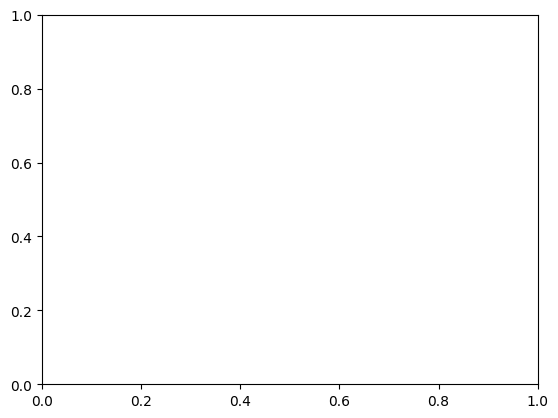

In [13]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)

Implrmentation

In [14]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

def hypothesis(X,theta):
    return sigmoid(np.dot(X,theta))


def error(X,y,theta):
    hi = hypothesis(X,theta)
    e = -1*np.mean((y*np.log(hi)) + ((1-y)*np.log(1-hi)))
    return e

def gradient(X,y,theta):
    hi = hypothesis(X,theta)
    grad = np.dot(X.T,(y-hi))
    return grad/X.shape[0]

def gradient_decenet(X,y,lr=0.5,max_steps=500):
    theta = np.zeros((X.shape[1],1))
    error_list = []
    for i in range(max_steps):
        err = error(X,y,theta)
        error_list.append(err)
        grad = gradient(X,y,theta)
        theta = theta+lr*grad

    return (theta, error_list)





In [15]:
X_with_bias = np.hstack((np.ones((X_train.shape[0],1)), X_train))
print(X_with_bias)


[[ 1.         -1.25172038 -0.63731812]
 [ 1.          0.64993836  1.15576565]
 [ 1.         -1.01249275 -1.06953889]
 [ 1.          0.4598698   1.0889147 ]
 [ 1.          1.31126869  0.9857168 ]
 [ 1.         -1.1360955  -0.8212775 ]
 [ 1.          1.32663565  1.74191576]
 [ 1.         -0.93281168 -1.36991088]
 [ 1.         -1.48215798 -0.91570626]
 [ 1.          0.48477391  1.37084201]
 [ 1.         -0.18528454 -0.78944159]
 [ 1.          0.66111234  1.06075819]
 [ 1.         -1.71537565 -0.65832551]
 [ 1.          1.96145313  1.16068082]
 [ 1.          1.96299779  1.7934101 ]
 [ 1.          0.19899392 -1.29030499]
 [ 1.          1.18539521  1.10529176]
 [ 1.          0.99391177 -1.22041559]
 [ 1.         -0.93937647 -0.67246086]
 [ 1.          0.24817849  0.47894228]
 [ 1.          0.35900616  0.60257949]
 [ 1.          1.49016799  1.79325407]
 [ 1.         -0.53499337 -0.52511455]
 [ 1.          1.01953152  1.16132664]
 [ 1.         -1.13430871 -0.79994415]
 [ 1.          1.68977216

In [16]:
# Y_train = Y_train.reshape((-1,1))
theta,error_list  = gradient_decenet(X_with_bias,Y_train)

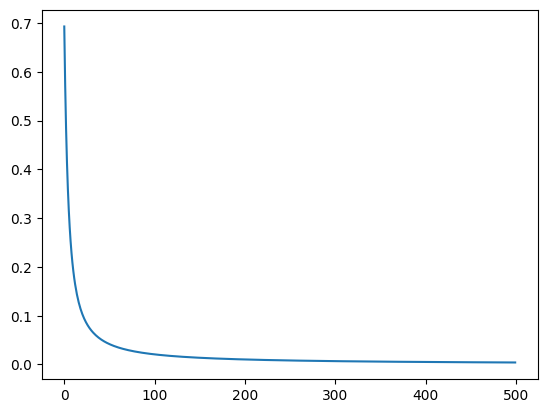

In [17]:
plt.plot(error_list)

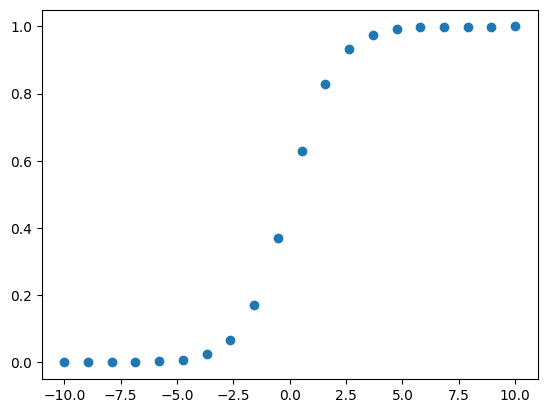

In [18]:
a = np.linspace(-10,10,20)
plt.scatter(a,sigmoid(a))

In [19]:
from sklearn.linear_model import LogisticRegression

In [21]:
model = LogisticRegression()
model.fit(X_train, Y_train)

ValueError: Found input variables with inconsistent numbers of samples: [200, 800]